In [37]:
import os
from tqdm import tqdm
from collections import Counter
from scipy.spatial import distance as dst

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# k-Nearest Neighbors

In [ ]:
basic idea: predict the label of a data point by 
* looking at the k closest labeled data points
* taking a majority vote

In [ ]:
* knn é um algoritmo não paramétrico
ou seja, ele não faz nenhuma suposição sobre a forma da função que estamos prever. 
isso impede erros de modelagem.
* knn é um algortimo "Instance-Based learning"
isto é, não faz nenhuma ação explícita quando aprende um modelo.
o kNN é conhecido por ter um treino mínimo mas ter um teste pesado.

In [ ]:
* kNN é um tipo de algoritmo que funciona bem quando o número de features é baixo.
* kNN exige que todas as features sejam categóricas ou continuas. 
se tiver uma mistura, as variáveis categoricas devem ser mapeadas por numeros.

## model complexity

In [ ]:
* larger k =  smoother  decision  boundary = less  complex model
* smaller k =  more complex  model = can lead to over fitting

## métricas de distância

In [ ]:
* distância L1, euclideana, a mais comum, distância em linha reta entre dois pontos.
scipy.spatial.distance.euclidean(). 
existem várias outras: 
* Hamming , que serve para diferenças categóricas
* Manhattan

# KNN classification

In [4]:
filepath = os.path.join("data", "iris.csv")
iris = pd.read_csv(filepath)
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data = iris.drop('Name',  axis=1)
target = iris["Name"]

In [7]:
#using scikit-learn to fit a classifier
knn =  KNeighborsClassifier(n_neighbors=6)
knn.fit(data, target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [8]:
data.shape

(150, 4)

In [9]:
target.shape

(150,)

In [12]:
#predicting on unlabeled data
und = pd.DataFrame([[5.9,3,5.1,1.8],[5.8,2.7,3.9,1.2],[4.4,3.2,1.3,0.2]])
prediction =  knn.predict(und)
und.shape

(3, 4)

In [16]:
print('Prediction  {}'.format(prediction))

Prediction  ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa']


## digits

In [10]:
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
#print(digits.keys())
#print(digits['DESCR'])

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


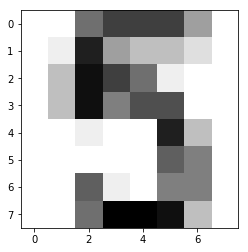

In [11]:
# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [14]:
# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.983333333333


## k-fold cross-validation to find optimal # of neighbors

In [15]:
# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)
neighbors = list(neighbors)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in tqdm(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

100%|██████████████████████████████████████████| 25/25 [00:33<00:00,  1.34s/it]


The optimal number of neighbors is 3


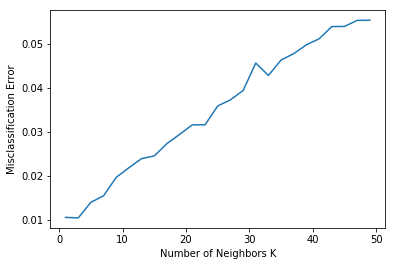

In [16]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

## GridSearch cross-validation to find best parameters for KNN

In [18]:
# Set the parameters for cross-validation
tuned_parameters = [{'metric': ['euclidean', 'hamming'], 'n_neighbors': [1,2,3,4,5,6,7,8,9]}]

In [19]:
%%time
clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=10)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best parameters set found on development set:

{'metric': 'euclidean', 'n_neighbors': 1}

Grid scores on development set:

0.990 (+/-0.019) for {'metric': 'euclidean', 'n_neighbors': 1}
0.985 (+/-0.018) for {'metric': 'euclidean', 'n_neighbors': 2}
0.990 (+/-0.018) for {'metric': 'euclidean', 'n_neighbors': 3}
0.986 (+/-0.022) for {'metric': 'euclidean', 'n_neighbors': 4}
0.986 (+/-0.025) for {'metric': 'euclidean', 'n_neighbors': 5}
0.987 (+/-0.021) for {'metric': 'euclidean', 'n_neighbors': 6}
0.985 (+/-0.032) for {'metric': 'euclidean', 'n_neighbors': 7}
0.984 (+/-0.031) for {'metric': 'euclidean', 'n_neighbors': 8}
0.981 (+/-0.026) for {'metric': 'euclidean', 'n_neighbors': 9}
0.857 (+/-0.051) for {'metric': 'hamming', 'n_neighbors': 1}
0.809 (+/-0.044) for {'metric': 'hamming', 'n_neighbors': 2}
0.857 (+/-0.035) for {'metric': 'hamming', 'n_neighbors': 3}
0.849 (+/-0.039) for {'metric': 'hamming', 'n_neighbors': 4}
0.857 (+/-0.046) for {'metric': 'hamming', 'n_neighbors': 5}
0.842

# KNN regression

In [ ]:
A simple implementation of KNN regression 
is to calculate the average of the numerical target of the K nearest neighbors. 
Another approach uses an inverse distance weighted average of the K nearest neighbors. 
KNN regression uses the same distance functions as KNN classification.

In [20]:
filepath = os.path.join("data", "slump.txt")
slump = pd.read_csv(filepath, sep='\t')

In [21]:
slump.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [26]:
slump.dtypes

Cement                                float64
Slag                                  float64
Fly ash                               float64
Water                                 float64
SP                                    float64
Coarse Aggr.                          float64
Fine Aggr.                            float64
SLUMP(cm)                             float64
FLOW(cm)                              float64
Compressive Strength (28-day)(Mpa)    float64
dtype: object

In [33]:
X = slump[['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.','Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)']]
y = slump[['Compressive Strength (28-day)(Mpa)']]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

In [35]:
neigh.score(X_test,y_test)

0.7955995240015431

## classification goal: predict if client will subscribe (yes/no) a term deposit (variable y)

In [39]:
filepath = os.path.join("data", "bank-full.csv")
bank = pd.read_csv(filepath, sep=';')

In [5]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


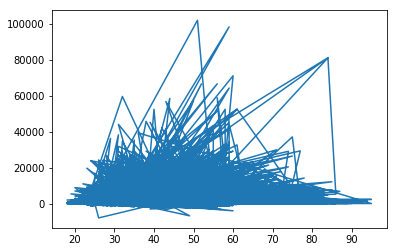

In [40]:
plt.plot(bank["age"],bank["balance"])
plt.show()

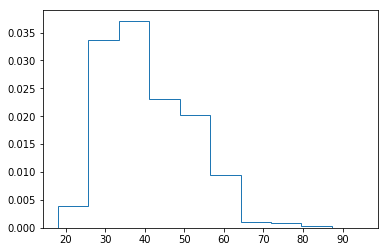

In [41]:
plt.hist(bank["age"],normed=True, histtype="step")
plt.show()

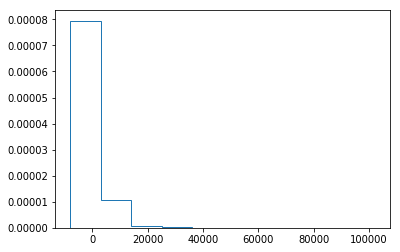

In [42]:
plt.hist(bank["balance"],normed=True, histtype="step")
plt.show()

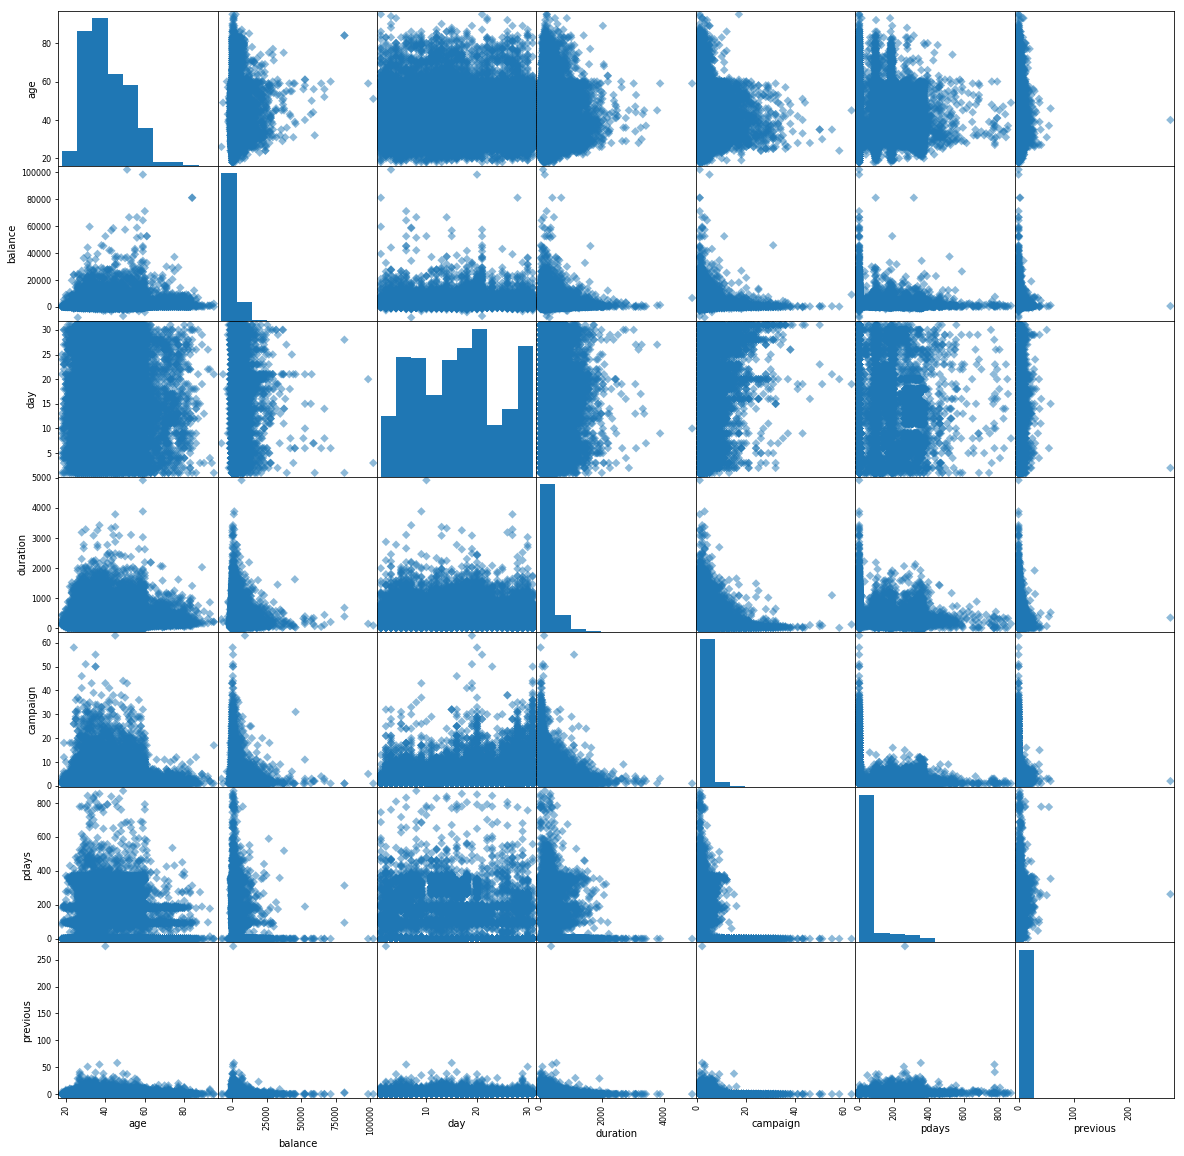

In [43]:
plt.figure()
pd.plotting.scatter_matrix(bank, figsize = (20,20), marker = 'D')
plt.show()

In [44]:
Counter(bank["pdays"]).most_common(5)

[(-1, 36954), (182, 167), (92, 147), (91, 126), (183, 126)]

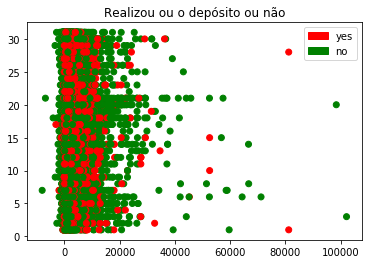

In [7]:
colors=[]
for label in bank['y']:
    if label == 'yes':
        colors.append('red')
    else:
        colors.append('green')
        
legend_dict = { 'yes' : 'red', 'no' : 'green' }

plt.title('Realizou ou o depósito ou não')
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

plt.scatter(bank['balance'], bank['day'],color=colors)
plt.legend(handles=patchList)
plt.show()

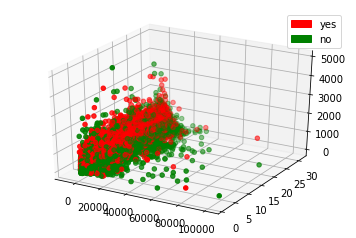

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(bank['balance'], bank['day'], bank['duration'], color=colors)
plt.legend(handles=patchList)
plt.show()

In [ ]:
talvez não seja possível traçar uma linha que resolva o problema 
e tenhamos que partir para técnicas mais sofisticadas que sejam capazes de pegar essa "fronteira". 
esse é o casos dos classificadores não lineares: Redes Neurais e kNN

## transformando categorias em numeros

In [36]:
bank['job'] = bank.job.astype("category").cat.codes
bank['marital'] = bank.marital.astype("category").cat.codes
bank['education'] = bank.education.astype("category").cat.codes
bank['default'] = bank.default.astype("category").cat.codes
bank['housing'] = bank.housing.astype("category").cat.codes
bank['loan'] = bank.loan.astype("category").cat.codes
bank['contact'] = bank.contact.astype("category").cat.codes
bank['month'] = bank.month.astype("category").cat.codes
bank['poutcome'] = bank.poutcome.astype("category").cat.codes
bank['y'] = bank.y.astype("category").cat.codes